# Contexto

El Dataset refleja un reporte sobre trabajadores activos e inactivos en la empresa. A traves de este dataset se pueden observar patrones para tener una clara imagen de como es la fuerza laboral de la empresa.

SMART
Identificar como esta compuesta la fuerza laboral de la empresa con el objetivo de comprender como es el cliente interno y asi poder diseñar politicas de bienestar y retener talento humano. 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import sklearn
from scipy.stats import pearsonr
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix



file_path = 'HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

no_df = df[df['Attrition'] == 'No']


#  1) Analisis General del Dataset

In [52]:
no_df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
1   49        No  Travel_Frequently        279  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
1                 8          1  Life Sciences              1               2   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
1  ...                         4            80                 1   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   
6  ...                         1            80                 3   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1                 10                      3               3              10   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   
6                 12                      3               2               1   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1                  7                        1                     7  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  
6                  0                        0                     0  

[5 rows x 35 columns]

In [53]:
no_df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

In [54]:
no_df.shape

(1233, 35)

In [55]:
len(no_df.index)

1233

### El Dataset tiene 1233 empleados activos y 35 variables

In [56]:
no_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1233 non-null   int64 
 1   Attrition                 1233 non-null   object
 2   BusinessTravel            1233 non-null   object
 3   DailyRate                 1233 non-null   int64 
 4   Department                1233 non-null   object
 5   DistanceFromHome          1233 non-null   int64 
 6   Education                 1233 non-null   int64 
 7   EducationField            1233 non-null   object
 8   EmployeeCount             1233 non-null   int64 
 9   EmployeeNumber            1233 non-null   int64 
 10  EnvironmentSatisfaction   1233 non-null   int64 
 11  Gender                    1233 non-null   object
 12  HourlyRate                1233 non-null   int64 
 13  JobInvolvement            1233 non-null   int64 
 14  JobLevel                

### El dataset de trabajadores activos tiene 26 variables cuantitativas y 9 variables cualitativas

In [57]:
print(type(no_df))

<class 'pandas.core.frame.DataFrame'>


In [58]:
#No hay variables redundates o repetitivas
no_df.duplicated().sum()

0

In [59]:
no_df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1233.000000  1233.000000       1233.000000  1233.000000         1233.0   
mean     37.561233   812.504461          8.915653     2.927007            1.0   
std       8.888360   403.208379          8.012633     1.027002            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      31.000000   477.000000          2.000000     2.000000            1.0   
50%      36.000000   817.000000          7.000000     3.000000            1.0   
75%      43.000000  1176.000000         13.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1233.000000              1233.000000  1233.000000     1233.000000   
mean      1027.656123                 2.771290    65.952149        2.770479   
std        606.217074                 1.071132    20.380754        0.692050   
min          2.000000                 1.000000    30.000000        1.000000   
25%        483.000000                 2.000000    48.000000        2.000000   
50%       1022.000000                 3.000000    66.000000        3.000000   
75%       1574.000000                 4.000000    83.000000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1233.000000  ...               1233.000000         1233.0   
mean      2.145985  ...                  2.733982           80.0   
std       1.117933  ...                  1.071603            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1233.000000        1233.000000            1233.000000   
mean           0.845093          11.862936               2.832928   
std            0.841985           7.760719               1.293585   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          16.000000               3.000000   
max            3.000000          38.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1233.000000     1233.000000         1233.000000   
mean          2.781022        7.369019            4.484185   
std           0.681907        6.096298            3.649402   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        6.000000            3.000000   
75%           3.000000       10.000000            7.000000   
max           4.000000       37.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1233.000000           1233.000000  
mean                  2.234388              4.367397  
std                   3.234762              3.594116  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

### En promedio, la edad de los trabajadores activos es 38 años,  llevan 7.4 años en el empresa, 4.3 años con el mismo jefe, viven a una distancia de 9 km del trabajo.

# 2) Analisis de datos nulos

In [60]:
missing_data = no_df.isnull()
missing_data.head(10)

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1   False      False           False      False       False             False   
3   False      False           False      False       False             False   
4   False      False           False      False       False             False   
5   False      False           False      False       False             False   
6   False      False           False      False       False             False   
7   False      False           False      False       False             False   
8   False      False           False      False       False             False   
9   False      False           False      False       False             False   
10  False      False           False      False       False             False   
11  False      False           False      False       False             False   

    Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
1       False           False          False           False  ...   
3       False           False          False           False  ...   
4       False           False          False           False  ...   
5       False           False          False           False  ...   
6       False           False          False           False  ...   
7       False           False          False           False  ...   
8       False           False          False           False  ...   
9       False           False          False           False  ...   
10      False           False          False           False  ...   
11      False           False          False           False  ...   

    RelationshipSatisfaction  StandardHours  StockOptionLevel  \
1                      False          False             False   
3                      False          False             False   
4                      False          False             False   
5                      False          False             False   
6                      False          False             False   
7                      False          False             False   
8                      False          False             False   
9                      False          False             False   
10                     False          False             False   
11                     False          False             False   

    TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1               False                  False            False           False   
3               False                  False            False           False   
4               False                  False            False           False   
5               False                  False            False           False   
6               False                  False            False           False   
7               False                  False            False           False   
8               False                  False            False           False   
9               False                  False            False           False   
10              False                  False            False           False   
11              False                  False            False           False   

    YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1                False                    False                 False  
3                False                    False                 False  
4                False                    False                 False  
5                False                    False                 False  
6                False                    False                 False  
7                False                    False                 False  
8                False                    False                 False  
9                False                    False                 False  
10               False                    False                 False  
11               False    

In [61]:
null_counts = no_df.isnull().sum()


print(null_counts)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Podemos observar que el dataset es muy completo ya que no tiene valores nulos. 

# 3) Analisis de Outliers

C:\Users\ju\AppData\Local\Temp\ipykernel_32600\3841493093.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_df.loc[:, features] = scaler.fit_transform(no_df.loc[:, features])


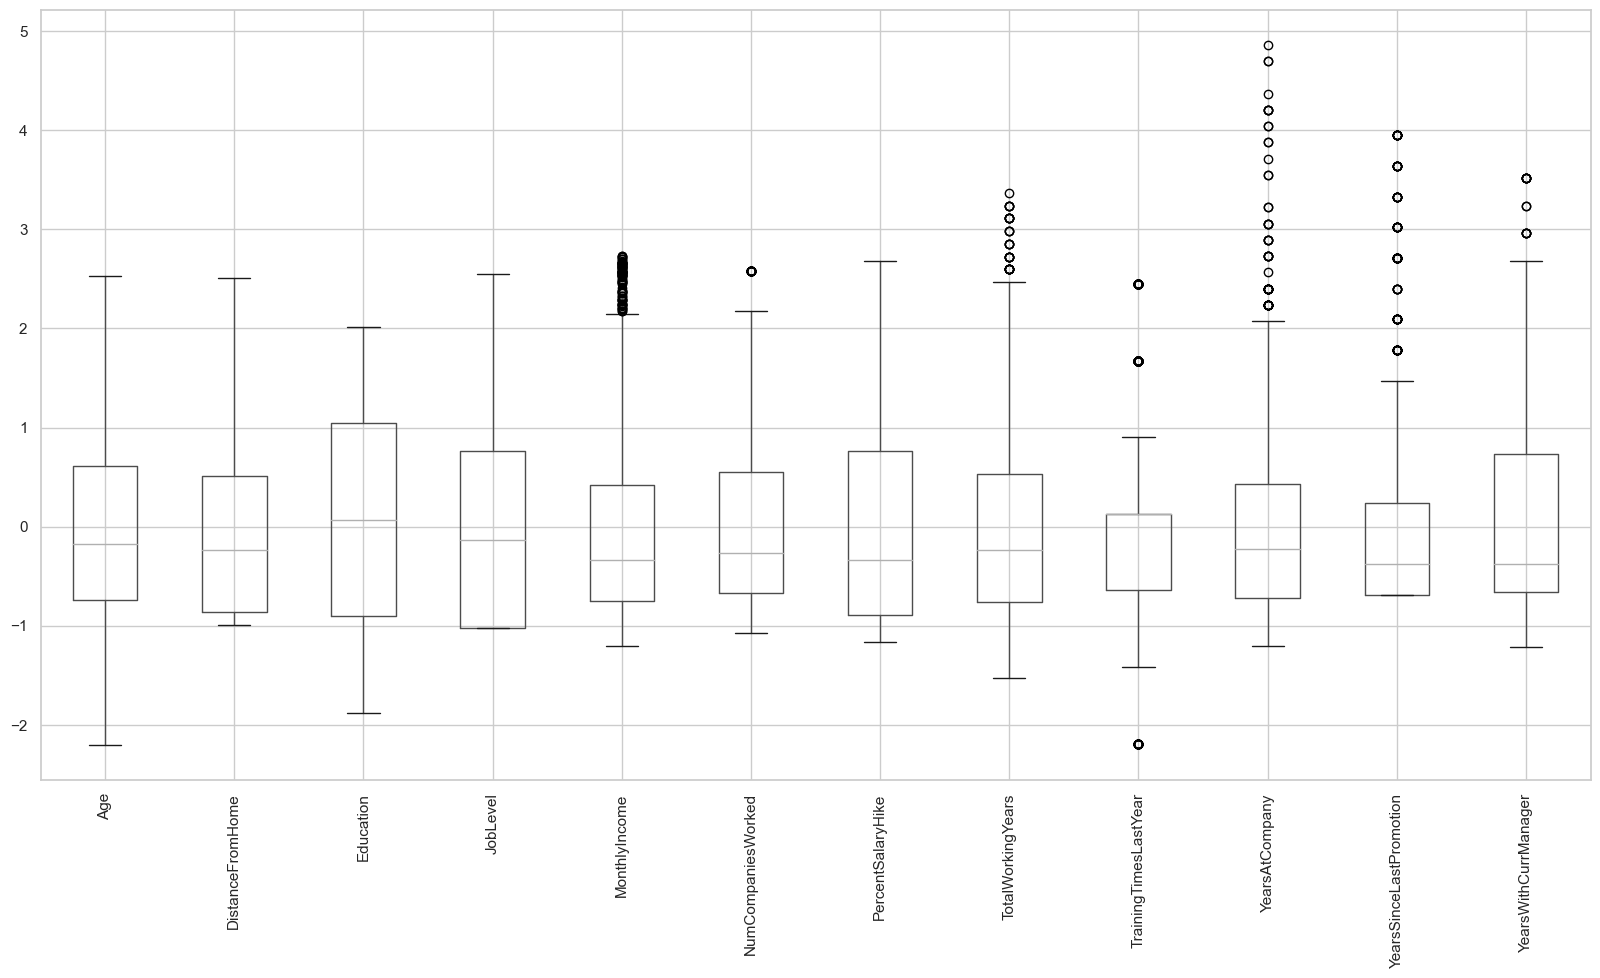

In [64]:
features = ['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
            'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
            'YearsWithCurrManager']

scaler = StandardScaler()
no_df.loc[:, features] = scaler.fit_transform(no_df.loc[:, features])


plt.figure(figsize=(20,10))
no_df[features].boxplot()
plt.xticks(rotation=90)
plt.show()


### Debido a la naturaleza de las variables con outliers y su tamaño no es necesario tratalos de forma especial. 

# 4) Analisis Univariado, estadistico y grafico

In [25]:

discrete_columns = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


for column in discrete_columns:
    print("Valores únicos para la columna '{}':".format(column))
    print(no_df[column].value_counts())
    print("\n")

Valores únicos para la columna 'BusinessTravel':
Travel_Rarely        887
Travel_Frequently    208
Non-Travel           138
Name: BusinessTravel, dtype: int64


Valores únicos para la columna 'Department':
Research & Development    828
Sales                     354
Human Resources            51
Name: Department, dtype: int64


Valores únicos para la columna 'Education':
3    473
4    340
2    238
1    139
5     43
Name: Education, dtype: int64


Valores únicos para la columna 'EducationField':
Life Sciences       517
Medical             401
Marketing           124
Technical Degree    100
Other                71
Human Resources      20
Name: EducationField, dtype: int64


Valores únicos para la columna 'EnvironmentSatisfaction':
3    391
4    386
2    244
1    212
Name: EnvironmentSatisfaction, dtype: int64


Valores únicos para la columna 'JobInvolvement':
3    743
2    304
4    131
1     55
Name: JobInvolvement, dtype: int64


Valores únicos para la columna 'JobLevel':
2    482
1    4

### Se puede destacar que 71.9% de la fuerza laboral viaja rara vez, tiene un nivel de educacion intermedio e intermedio-alto, el 41.93% tiene educacion en ciencias de la vida y 32.5% en medicina lo que hace entender que es una empresa en el sector de la salud.  En cuanto a satisfaccion del ambiente, de relaciones y de trabajo las mayores calificaciones estan entre 3 y 4 e un total de 4, un puntaje bueno. En cuanto a los puestos de trabajo, el ejecutivo de ventas cubre un 21.82% de la fuerza laboral. el 62.12% de la fuerza laboral considera que el balance entre vida y trabajo es de 3/4, tambn un puntaje bueno pero que puede ser mayor.

Resumen estadístico de las variables continuas:
               Age    DailyRate  DistanceFromHome   HourlyRate  MonthlyIncome  \
count  1233.000000  1233.000000       1233.000000  1233.000000    1233.000000   
mean     37.561233   812.504461          8.915653    65.952149    6832.739659   
std       8.888360   403.208379          8.012633    20.380754    4818.208001   
min      18.000000   102.000000          1.000000    30.000000    1051.000000   
25%      31.000000   477.000000          2.000000    48.000000    3211.000000   
50%      36.000000   817.000000          7.000000    66.000000    5204.000000   
75%      43.000000  1176.000000         13.000000    83.000000    8834.000000   
max      60.000000  1499.000000         29.000000   100.000000   19999.000000   

        MonthlyRate  TotalWorkingYears  YearsAtCompany  YearsInCurrentRole  \
count   1233.000000        1233.000000     1233.000000         1233.000000   
mean   14265.779400          11.862936        7.369019            

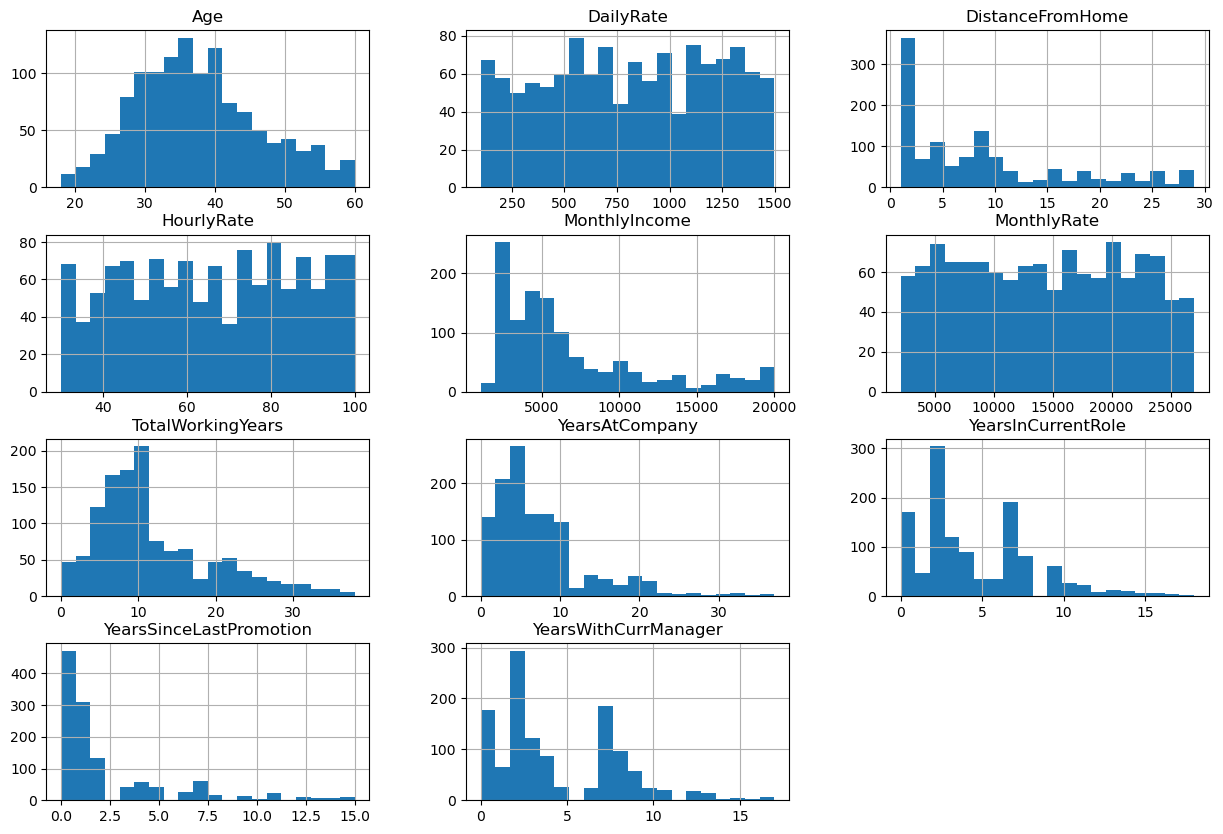

Boxplots de las variables continuas:


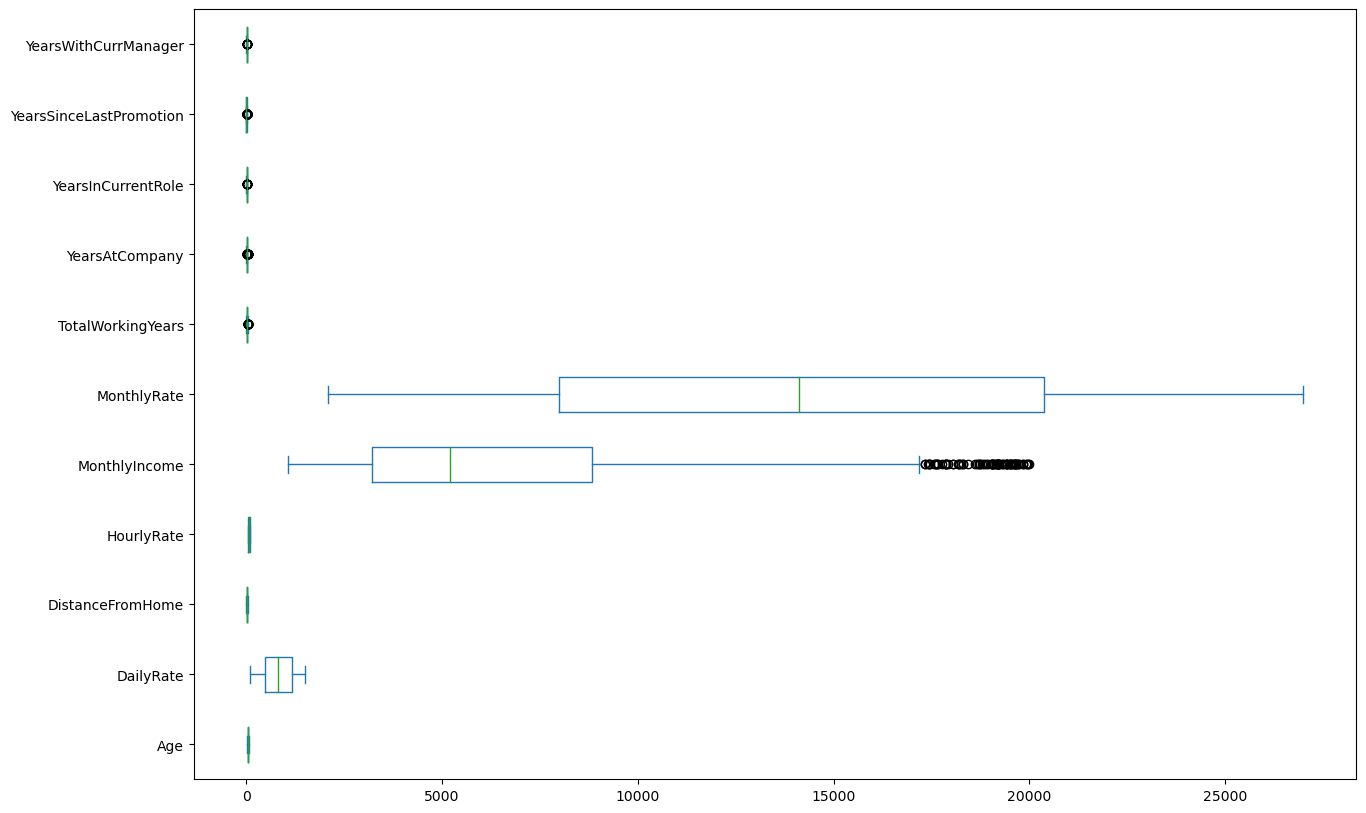

In [26]:

continuous_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

print("Resumen estadístico de las variables continuas:")
print(no_df[continuous_columns].describe())
print("\n")


print("Histogramas de las variables continuas:")
no_df[continuous_columns].hist(bins=20, figsize=(15, 10))
plt.show()


print("Boxplots de las variables continuas:")
no_df[continuous_columns].plot(kind='box', vert=False, figsize=(15, 10))
plt.show()

### Para destacar de los histogramas es que la mayoria de trabajadores  viven a menos de 5km de la oficina, el ingreso mensual es menor a 5000, tienen experiencia por menos de 10 años, asi como menos de 10 años en la compañia, menos de 5 años en el mismo rol y con el mismo jefe. La fuerza laboral tiene menos de 2.5 años desde que la promovieron.

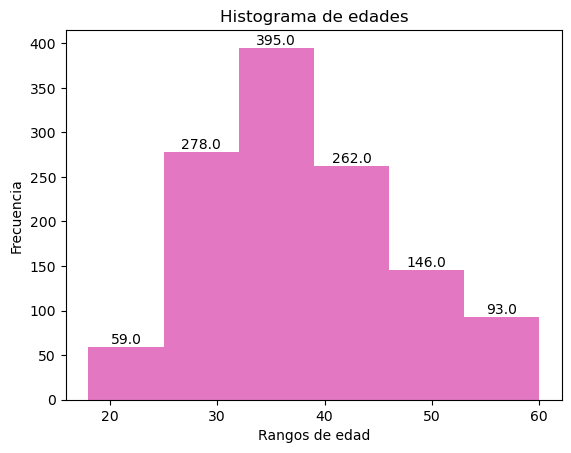

In [27]:

age_ranges = [18, 25, 32, 39, 46, 53, 60]
Age = no_df['Age'].tolist()

plt.hist(Age, bins=age_ranges, edgecolor='white', facecolor='lightgreen')

plt.title('Histograma de edades')
plt.xlabel('Rangos de edad')
plt.ylabel('Frecuencia')


for i in range(len(age_ranges)-1):
    x = (age_ranges[i] + age_ranges[i+1]) / 2 
    y = plt.hist(Age, bins=age_ranges)[0][i]   
    plt.text(x, y, str(y), ha='center', va='bottom') 
plt.show()



In [28]:
#Distribucion de edades esta ligeramente sesgada a la derecha, menos simetria alrededor de la media
skewness = stats.skew(Age)
kurtosis = stats.kurtosis(Age)

print("Skewness: ", skewness)
print("Kurtosis: ", kurtosis)

Skewness:  0.40762502727016825
Kurtosis:  -0.4150290002784116


### Podemos observar que la mayoria de la fuerza laboral esta entre los 32 y los 39 años (32.04%), el intervalo donde se encuentra el promedio (37.6). Lo siguen los intervalos de 25 a 31 años (22.55%) y 40 a 46 años (21.25%). Podemos inferir que la empresa tiene una fuerza laboral joven pero ya con ciertos años de experiencia ( en promedio 11.8 años)

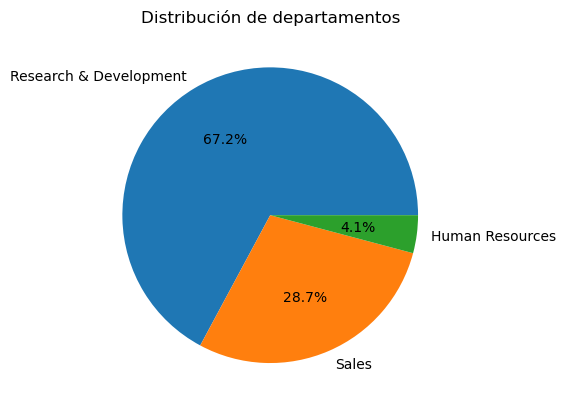

In [29]:
department_values = no_df['Department'].value_counts()

plt.pie(department_values, labels=department_values.index, autopct='%1.1f%%')

plt.title('Distribución de departamentos')

plt.show()


### La empresa esta mayoritariamente compuesta por trabajadores en el departamento de investigacion y desarrollo (829), seguido por el departamento de ventas (354) y por ultimo recursos humanos (50). Se puede inferir que la empresa tiene una estrategia enfocada en crear y mejorar sus productos o servicios, y despues tener un departamento de ventas que logre llegar al consumidor. 

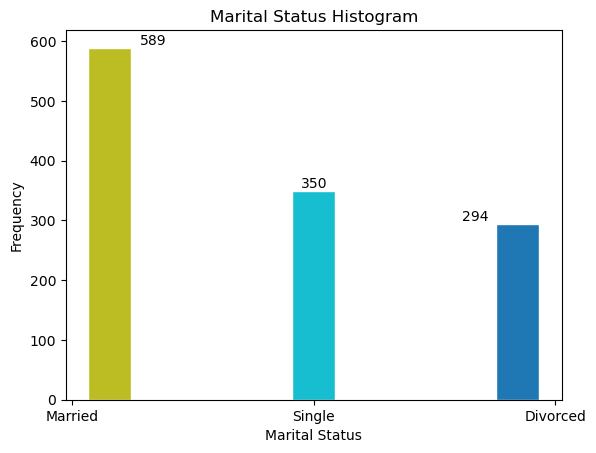

In [30]:
import matplotlib.pyplot as plt

marital_status = no_df['MaritalStatus']
status_counts = marital_status.value_counts()

# Crear un histograma para cada categoría de estado civil
plt.hist([marital_status[marital_status == s] for s in status_counts.index], bins=len(status_counts.index), edgecolor='white', alpha=0.5)

plt.title('Marital Status Histogram')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

# Agregar etiquetas de texto en la mitad de cada barra
for i, count in enumerate(status_counts):
    x = (plt.hist([marital_status[marital_status == s] for s in status_counts.index], bins=len(status_counts.index), edgecolor='white')[1][i] + plt.hist([marital_status[marital_status == s] for s in status_counts.index], bins=len(status_counts.index), edgecolor='white')[1][i+1]) / 2
    y = count
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.xticks(range(len(status_counts.index)), status_counts.index) # Establecer las etiquetas de x en los nombres de estado civil
plt.show()



###  El 47.77% de la fuerza laboral esta casado, mientras que el 28.39% es soltero y 23.84% esta divorciado. Podemos aconsejar a liderazgo en crear planes de bienestar enfocados en las personas casadas ya que tendria un  mayor impacto. Se podria tambien captar datos acerca de si tienen hijos, para asi crear un plan de accion enfocado en todo el nucleo familiar.

# Análisis de relación entre variables, estadístico y gráfico 

In [31]:
sns.pairplot(no_df)

In [32]:
corrmat = no_df.corr()
corrmat.style.background_gradient(cmap='Spectral_r', axis=None).format(precision=2)


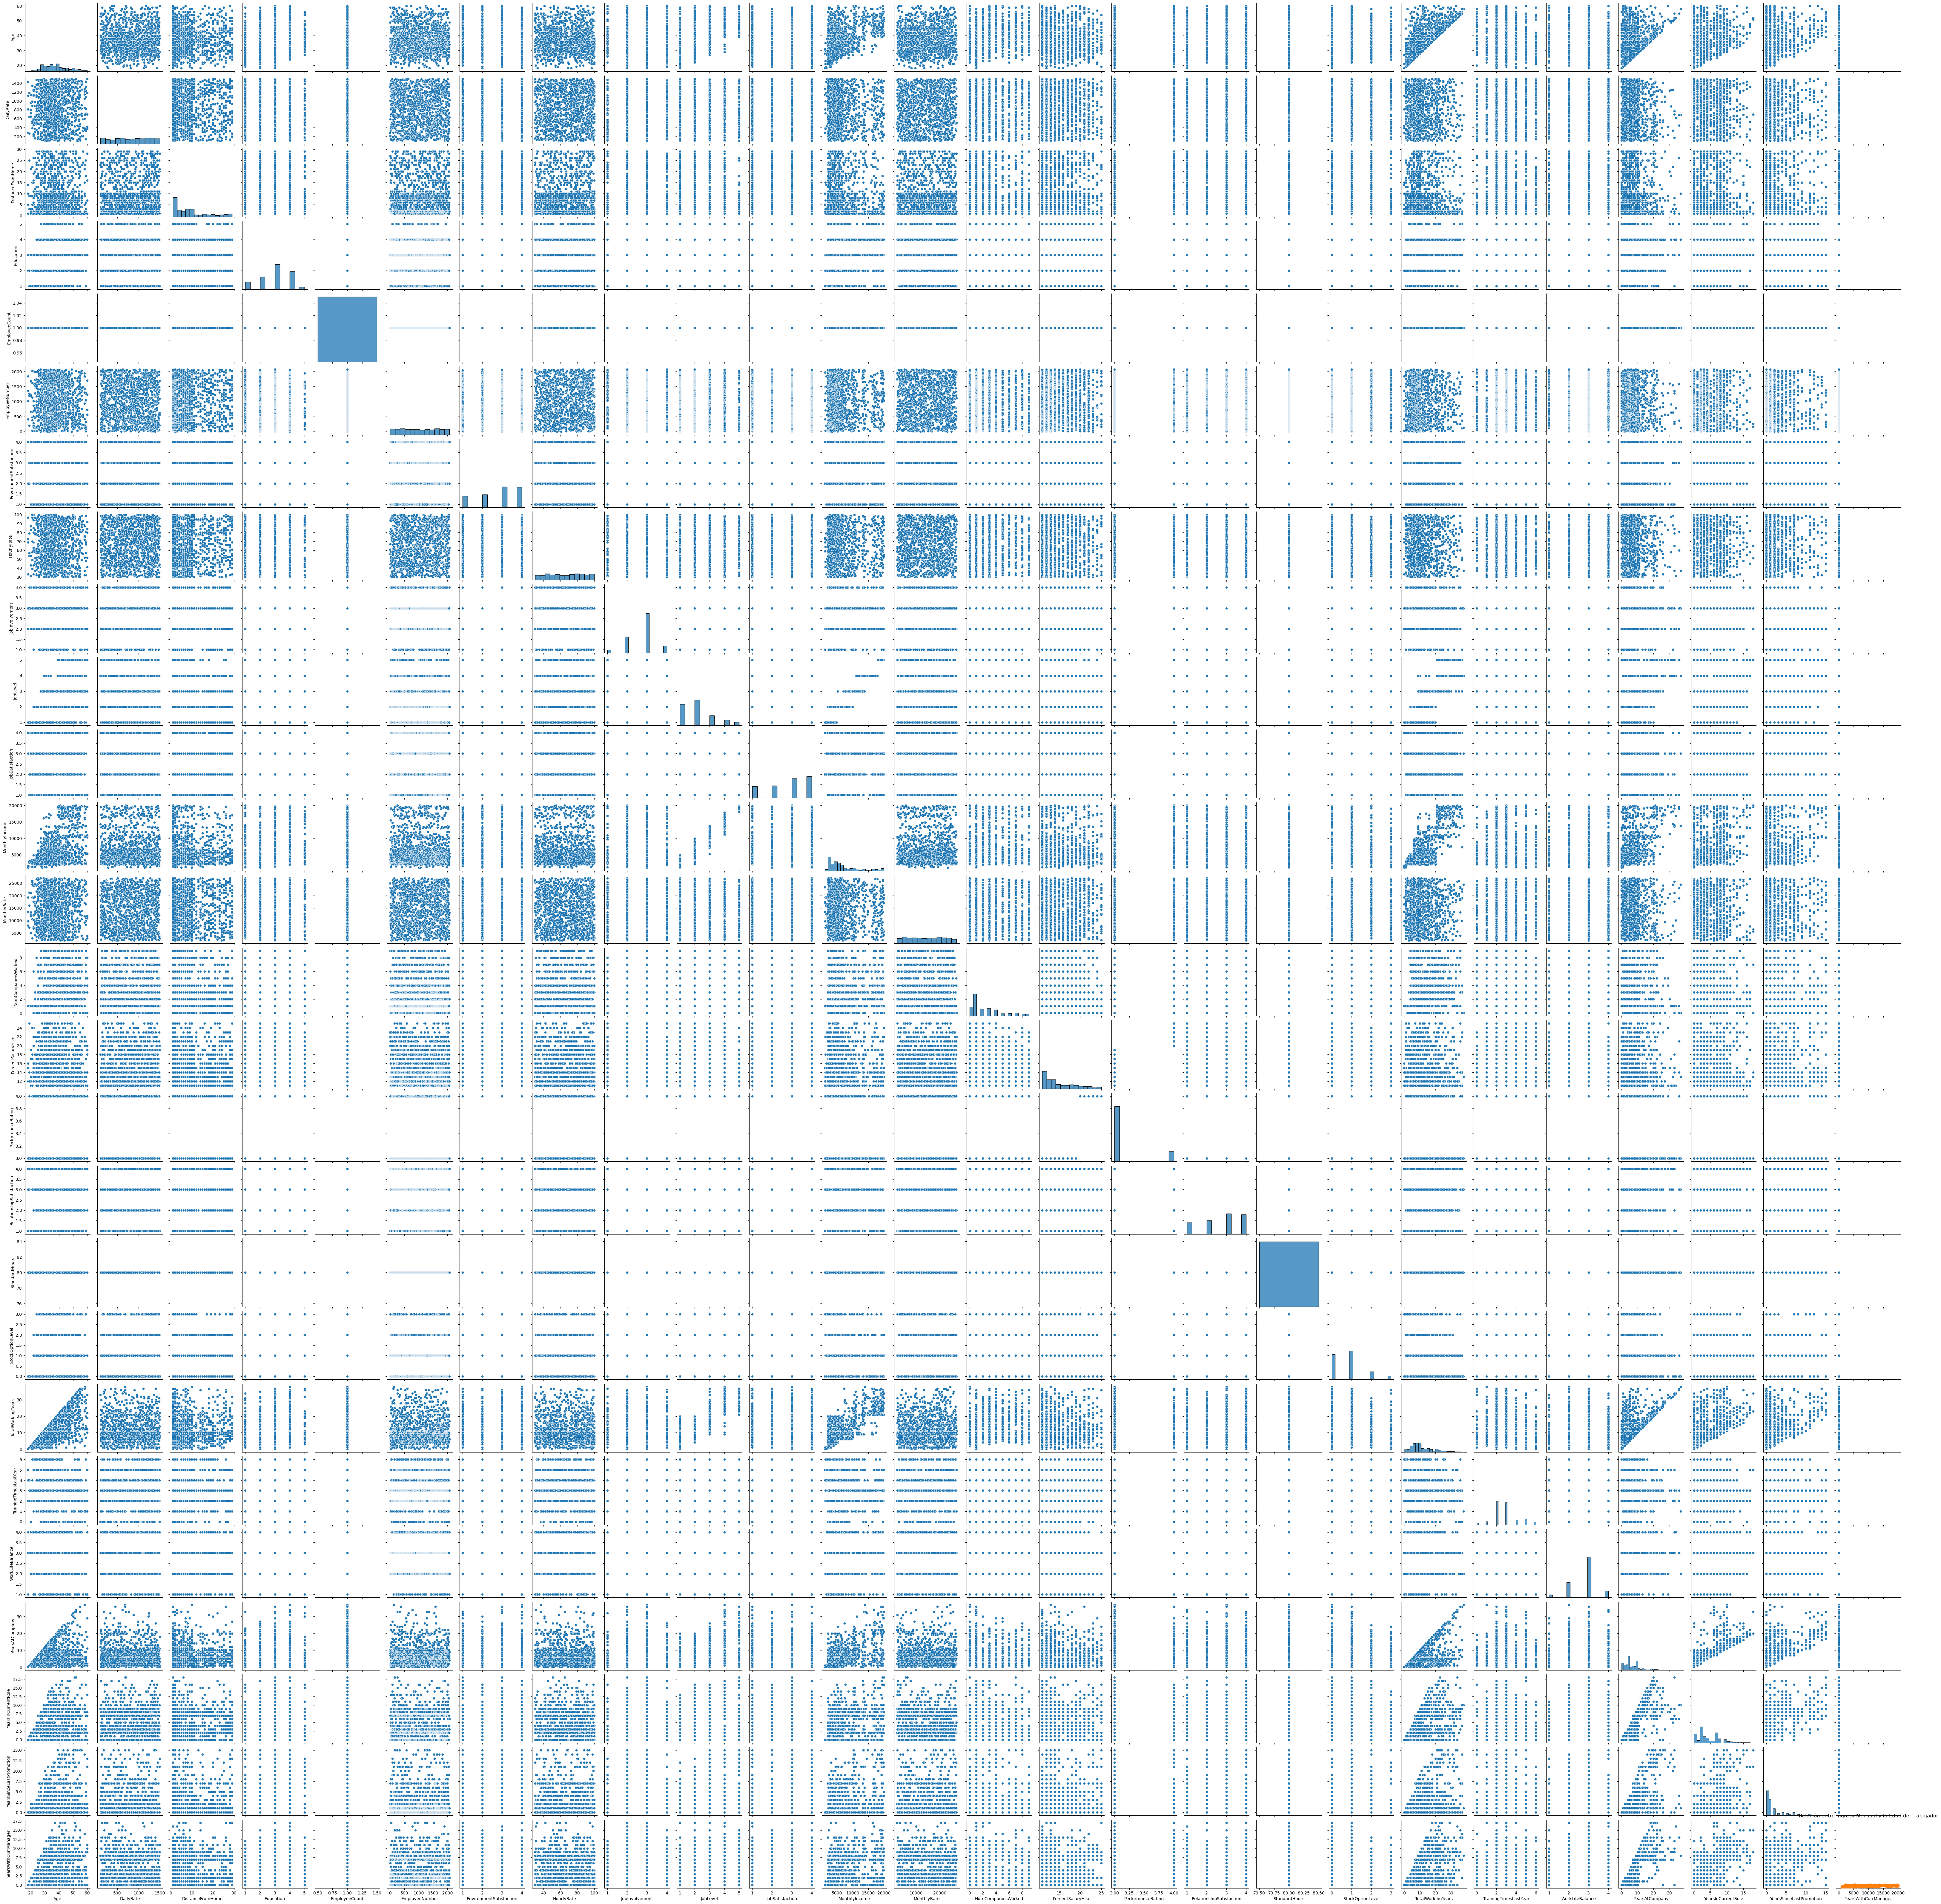

In [33]:
Age_values = no_df['Age'].tolist()
income_values = no_df['MonthlyIncome'].tolist()


plt.scatter(income_values, Age_values)


plt.title('Relación entre Ingreso Mensual y la Edad del trabajador')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Edad')


plt.show()

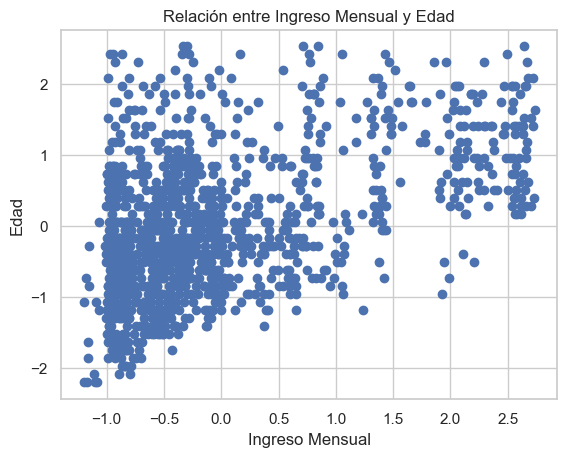

In [71]:
age_values = no_df['Age'].tolist()
income_values = no_df['MonthlyIncome'].tolist()

plt.scatter(income_values, age_values)

plt.title('Relación entre Ingreso Mensual y Edad')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Edad')

plt.show()

### La grafica muestra una relacion positiva, entre mas edad el salario tiende a ser mayor

In [72]:
corr_coef, p_val = pearsonr(no_df['MonthlyIncome'], no_df['Age'])

print("El coeficiente de correlación de Pearson es:", corr_coef)
print("El valor p correspondiente es:", p_val)


El coeficiente de correlación de Pearson es: 0.4867126686288622
El valor p correspondiente es: 2.517578332409613e-74


### La correlacion de pearson confirma una correlacion positiva moderada y el valor p nos indica que hay una correlacion significativa entre variables, no debido a una casualidad.

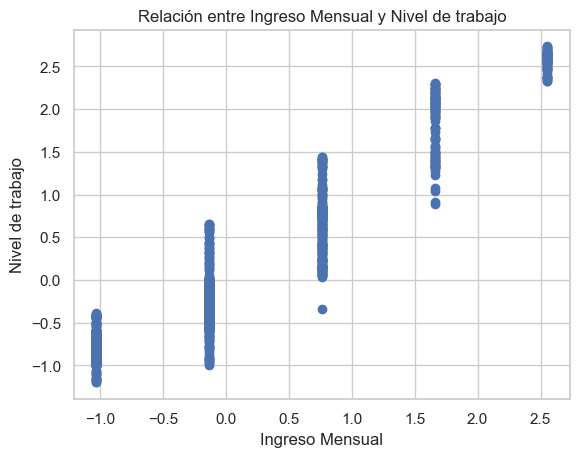

In [73]:
job_level_values = no_df['JobLevel'].tolist()
income_values = no_df['MonthlyIncome'].tolist()

plt.scatter(job_level_values, income_values)

plt.title('Relación entre Ingreso Mensual y Nivel de trabajo')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Nivel de trabajo')

plt.show()


In [74]:
corr_coef, p_val = pearsonr(no_df['MonthlyIncome'], no_df['JobLevel'])

print("El coeficiente de correlación de Pearson es:", corr_coef)
print("El valor p correspondiente es:", p_val)

El coeficiente de correlación de Pearson es: 0.9499760620453173
El valor p correspondiente es: 0.0


### Hay una fuerte correlacion positiva entre ingreso mensual y el nivel de trabajo y hay un chance extremadamente bajo de que sea una casualidad. Podriamos concluir que esta variable puede ser un predictor importante. Si intuitivamente lo analizamos con la correlacion anterior vemos que en la empresa la edad no predice tanto el salario como el nivel en el que esta y puede deberse al nivel de responsabilidad que se requiere en los cargos mas altos de una compañia.